In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [6]:
# Load datasets
train_data = pd.read_csv("C:/Users/rafif/Box/CS6350 project/data/train.csv")
test_data = pd.read_csv("C:/Users/rafif/Box/CS6350 project/data/test.csv")

In [7]:
# Set target and attribute names
outcome_label = "hba1c_next_value"
attributes = [
    "hba1c_last_value", "race_aian", "race_black", "race_hispanic", "race_nhpi",
    "sex_M", "marital_married",  "marital_unknown", 
    "region_midwest",  "region_south", "region_west",
    "diabetes_duration_2023", "Last_Med_MET", "Last_Med_SUL", 
    "Last_Med_SGLT2", "Last_Med_Insulin", "Last_Med_AlphaGI", "Last_Med_DPP4", 
    "Last_Med_GLP1", "Last_Med_GIP_GLP1", "Last_Med_TZD", "Added_Med_MET", 
    "Added_Med_SUL", "Added_Med_SGLT2", "Added_Med_Insulin", "Added_Med_AlphaGI", 
    "Added_Med_DPP4", "Added_Med_GLP1", "Added_Med_GIP_GLP1", "Added_Med_TZD"
]

In [8]:
# Extract features and labels
X_train = train_data[attributes].values
y_train = train_data[outcome_label].values
X_test = test_data[attributes].values
y_test = test_data[outcome_label].values

assert not np.isnan(X_train).any(), "X_train contains NaN values"
assert not np.isinf(X_train).any(), "X_train contains Inf values"
assert not np.isnan(y_train).any(), "y_train contains NaN values"
assert not np.isinf(y_train).any(), "y_train contains Inf values"

In [9]:
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Add intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [11]:
# Define batch gradient descent
# Define batch gradient descent with gradient clipping
# Define batch gradient descent with gradient clipping
def batch_gradient_descent(X, y, learning_rate=0.1, tolerance=1e-6, max_iterations=100000, max_gradient=1):
    m, n = X.shape
    w = np.zeros(n)
    cost_history = []
    for iteration in range(max_iterations):
        y_pred = X.dot(w)
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)
        gradient = (1 / m) * X.T.dot(y_pred - y)
        
        # Gradient clipping
        gradient = np.clip(gradient, -max_gradient, max_gradient)
        
        w_new = w - learning_rate * gradient
        if np.linalg.norm(w_new - w) < tolerance:
            print(f"BGD Converged in {iteration} iterations with final cost = {cost} with learning rate = {learning_rate}")
            break
        w = w_new
    return w, cost_history



In [12]:
# Experiment with multiple learning rates for BGD and save plots
learning_rates_bgd = [0.001, 0.0001]
plt.figure(figsize=(10, 6))  # Set figure size for readability
for lr in learning_rates_bgd:
    weights_bgd, cost_history = batch_gradient_descent(X_train, y_train, learning_rate=lr)
    y_train_pred = X_train.dot(weights_bgd)
    y_test_pred = X_test.dot(weights_bgd)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"BGD Learning Rate {lr} -> Train MSE: {train_mse}, Test MSE: {test_mse}")


BGD Converged in 13867 iterations with final cost = 0.7814931011428548 with learning rate = 0.001
BGD Learning Rate 0.001 -> Train MSE: 1.5629862022857095, Test MSE: 1.7990952412772894
BGD Learning Rate 0.0001 -> Train MSE: 1.5636580974235177, Test MSE: 1.8042919453623647


<Figure size 1000x600 with 0 Axes>

In [13]:
# Save the BGD plot
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('BGD Cost Function Progression for Different Learning Rates')
plt.legend()
plt.savefig("BGD_cost_function_progression.png")
plt.close()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [14]:
# Define stochastic gradient descent
# Define stochastic gradient descent with gradient clipping
def stochastic_gradient_descent(X, y, learning_rate=0.001, tolerance=1e-6, max_epochs=10000, max_gradient=0.2, batch_size=100):
    m, n = X.shape
    w = np.zeros(n)
    cost_history = []
    epoch_cost = []
    
    for epoch in range(max_epochs):
        cost = 0
        indices = np.random.permutation(m)
        X_shuffled, y_shuffled = X[indices], y[indices]
        
        for i in range(0, m, batch_size):
            end = min(i + batch_size, m)
            xi = X_shuffled[i:end]
            yi = y_shuffled[i:end]
            
            prediction = xi.dot(w)
            gradient = xi.T.dot(prediction - yi) / batch_size
            gradient = np.clip(gradient, -max_gradient, max_gradient)
            w -= learning_rate * gradient
            
            if i % 100 == 0:
                cost = (1 / (2 * m)) * np.sum((X.dot(w) - y) ** 2)
                cost_history.append(cost)
        
        epoch_cost.append(cost)
        if epoch > 1 and abs(epoch_cost[-1] - epoch_cost[-2]) < tolerance:
            print(f"SGD Converged in {epoch + 1} epochs with final cost = {cost}")
            break
    
    return w, cost_history


In [ ]:
# Experiment with multiple learning rates for SGD and save plots
learning_rates_sgd = [0.001, 0.0001]
plt.figure(figsize=(10, 6))  # Set figure size for readability
for lr in learning_rates_sgd:
    weights_sgd, cost_history = stochastic_gradient_descent(X_train, y_train, learning_rate=lr)
    y_train_pred = X_train.dot(weights_sgd)
    y_test_pred = X_test.dot(weights_sgd)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"SGD Learning Rate {lr} -> Train MSE: {train_mse}, Test MSE: {test_mse}")

# Save the SGD plot
plt.xlabel('Number of Updates')
plt.ylabel('Cost')
plt.title('SGD Cost Function Progression for Different Learning Rates')
plt.legend()
plt.savefig("SGD_cost_function_progression.png")
plt.close()

SGD Converged in 1807 epochs with final cost = 0.781851908673654
SGD Learning Rate 0.001 -> Train MSE: 1.5637038173473081, Test MSE: 1.7994384752905206


In [ ]:
#Emplementation of Neural Network Model

In [19]:
import numpy as np
from nn_sgd import NeuralNetwork

ModuleNotFoundError: No module named 'nn_sgd'

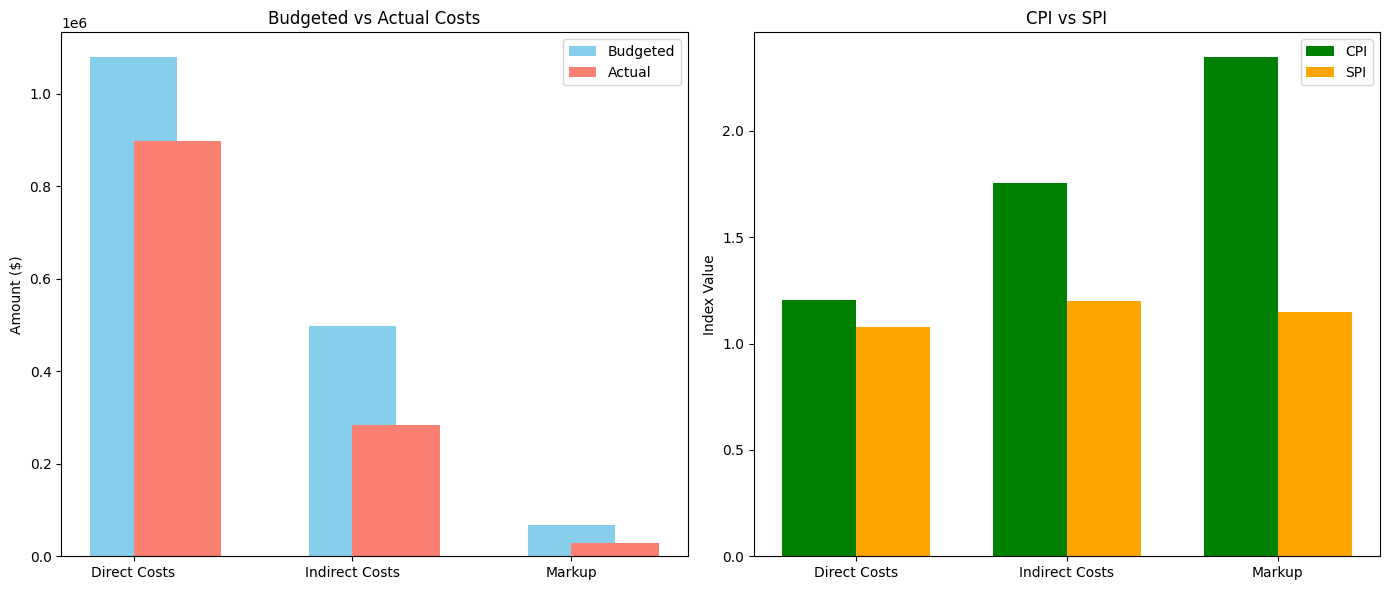

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for the cost control system
categories = ['Direct Costs', 'Indirect Costs', 'Markup']
budgeted = [1078962, 498833, 68255]
actual = [897000, 284000, 29100]
variance = [budgeted[i] - actual[i] for i in range(len(categories))]
cpi = [1.202856187, 1.756454225, 2.345532646]
spi = [1.08, 1.2, 1.15]

# Create subplots for two different graphs: Budgeted vs. Actual costs, CPI vs SPI
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Budgeted vs Actual costs
axes[0].bar(categories, budgeted, width=0.4, label='Budgeted', align='center', color='skyblue')
axes[0].bar(categories, actual, width=0.4, label='Actual', align='edge', color='salmon')
axes[0].set_title('Budgeted vs Actual Costs')
axes[0].set_ylabel('Amount ($)')
axes[0].legend()

# Bar plot for CPI and SPI
x = np.arange(len(categories))
width = 0.35  # the width of the bars
axes[1].bar(x - width / 2, cpi, width, label='CPI', color='green')
axes[1].bar(x + width / 2, spi, width, label='SPI', color='orange')
axes[1].set_title('CPI vs SPI')
axes[1].set_xticks(x)
axes[1].set_xticklabels(categories)
axes[1].set_ylabel('Index Value')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/cost_control_line_graph.png'

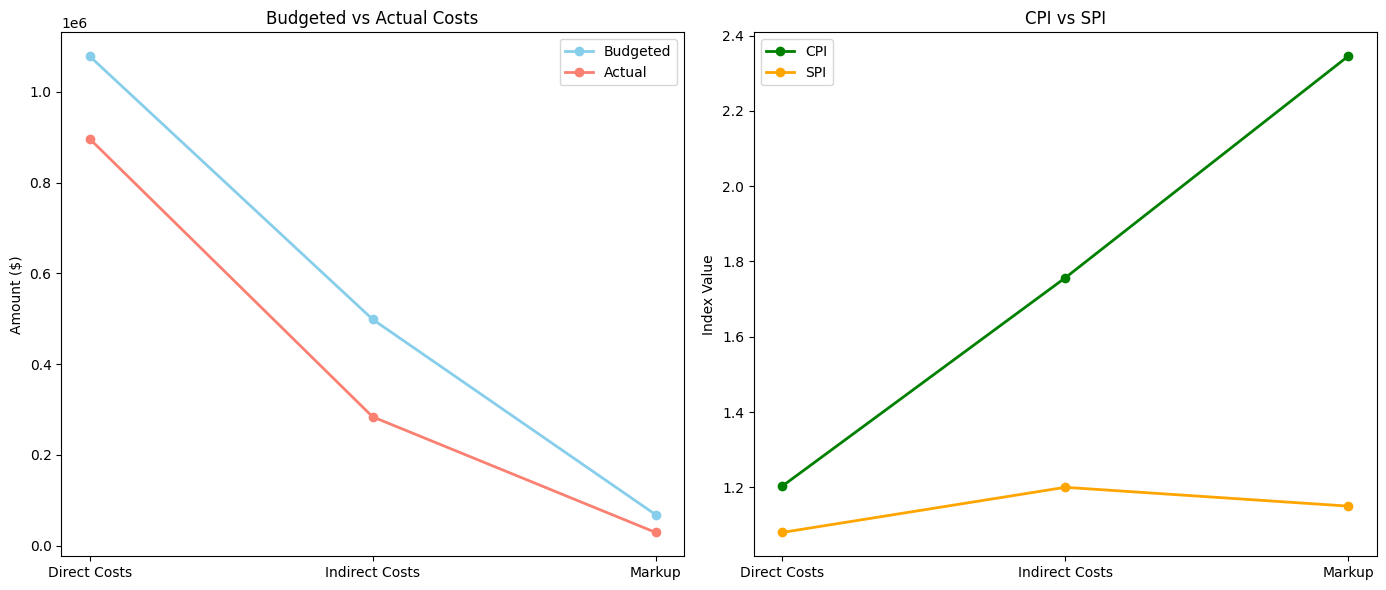

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the cost control system
categories = ['Direct Costs', 'Indirect Costs', 'Markup']
budgeted = [1078962, 498833, 68255]
actual = [897000, 284000, 29100]
variance = [budgeted[i] - actual[i] for i in range(len(categories))]
cpi = [1.202856187, 1.756454225, 2.345532646]
spi = [1.08, 1.2, 1.15]

# Create the figure and axis for the line graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Line graph for Budgeted vs Actual costs
axes[0].plot(categories, budgeted, label='Budgeted', marker='o', linestyle='-', color='skyblue', linewidth=2)
axes[0].plot(categories, actual, label='Actual', marker='o', linestyle='-', color='salmon', linewidth=2)
axes[0].set_title('Budgeted vs Actual Costs')
axes[0].set_ylabel('Amount ($)')
axes[0].legend()

# Line graph for CPI and SPI
axes[1].plot(categories, cpi, label='CPI', marker='o', linestyle='-', color='green', linewidth=2)
axes[1].plot(categories, spi, label='SPI', marker='o', linestyle='-', color='orange', linewidth=2)
axes[1].set_title('CPI vs SPI')
axes[1].set_ylabel('Index Value')
axes[1].legend()

# Save the figure as a PNG file
plt.tight_layout()
plt.savefig('/mnt/data/cost_control_line_graph.png')  # Save to a file for downloading

# Show the plot (optional)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/cost_control_line_graph.png'

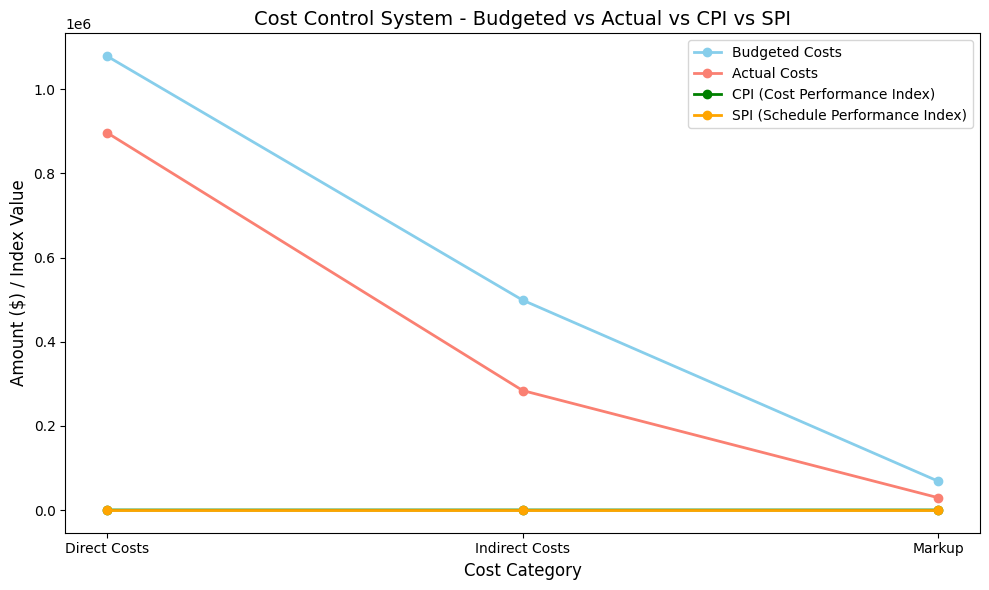

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the cost control system
categories = ['Direct Costs', 'Indirect Costs', 'Markup']
budgeted = [1078962, 498833, 68255]
actual = [897000, 284000, 29100]
variance = [budgeted[i] - actual[i] for i in range(len(categories))]
cpi = [1.202856187, 1.756454225, 2.345532646]
spi = [1.08, 1.2, 1.15]

# Create a figure and a single axis for the combined line graph
plt.figure(figsize=(10, 6))

# Plotting each line graph
plt.plot(categories, budgeted, marker='o', label='Budgeted Costs', color='skyblue', linestyle='-', linewidth=2)
plt.plot(categories, actual, marker='o', label='Actual Costs', color='salmon', linestyle='-', linewidth=2)
plt.plot(categories, cpi, marker='o', label='CPI (Cost Performance Index)', color='green', linestyle='-', linewidth=2)
plt.plot(categories, spi, marker='o', label='SPI (Schedule Performance Index)', color='orange', linestyle='-', linewidth=2)

# Adding labels and title
plt.title('Cost Control System - Budgeted vs Actual vs CPI vs SPI', fontsize=14)
plt.xlabel('Cost Category', fontsize=12)
plt.ylabel('Amount ($) / Index Value', fontsize=12)
plt.legend()

# Save the figure as a PNG file
plt.tight_layout()
plt.savefig('/mnt/data/cost_control_line_graph.png')  # Save to a file for download

# Show the plot
plt.show()

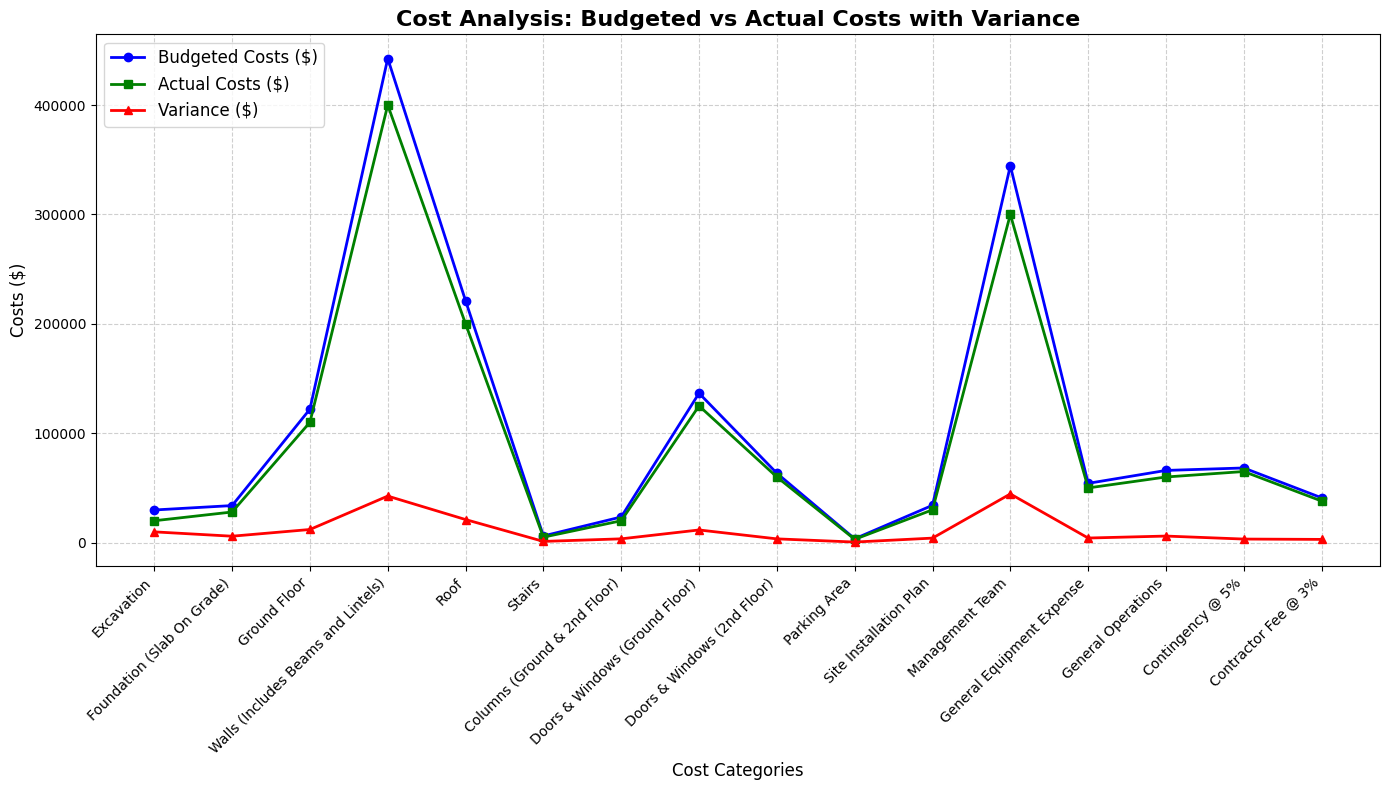

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = [
    "Excavation", "Foundation (Slab On Grade)", "Ground Floor", "Walls (Includes Beams and Lintels)", 
    "Roof", "Stairs", "Columns (Ground & 2nd Floor)", "Doors & Windows (Ground Floor)", 
    "Doors & Windows (2nd Floor)", "Parking Area", "Site Installation Plan", 
    "Management Team", "General Equipment Expense", "General Operations", "Contingency @ 5%", 
    "Contractor Fee @ 3%"
]
budgeted_costs = [
    29839, 33870, 122007, 442556, 221092, 6116, 23465, 136578, 63439, 3522, 
    34134, 344500, 54198, 66001, 68255, 40951
]
actual_costs = [
    20000, 28000, 110000, 400000, 200000, 5000, 20000, 125000, 60000, 3000, 
    30000, 300000, 50000, 60000, 65000, 38000
]
variances = [
    9839, 5870, 12007, 42556, 21092, 1116, 3465, 11578, 3439, 522, 
    4134, 44500, 4198, 6001, 3255, 2951
]

# Create a figure and axis
plt.figure(figsize=(14, 8))

# Plotting the data
plt.plot(categories, budgeted_costs, marker='o', label='Budgeted Costs ($)', color='blue', linewidth=2)
plt.plot(categories, actual_costs, marker='s', label='Actual Costs ($)', color='green', linewidth=2)
plt.plot(categories, variances, marker='^', label='Variance ($)', color='red', linewidth=2)

# Adding labels, title, and legend
plt.title("Cost Analysis: Budgeted vs Actual Costs with Variance", fontsize=16, weight='bold')
plt.xlabel("Cost Categories", fontsize=12)
plt.ylabel("Costs ($)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, loc='upper left')

# Tight layout for better spacing
plt.tight_layout()

# Save the plot to a file and display
plt.savefig("cost_analysis_line_graph.png", dpi=300)
plt.show()